# Projet MLops

#### Groupe : Lucas - Klervi - Elena - Thomas R
vasseur.corentin@gmail.com

# Mettre dans le requirement.txt

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import check_X_y

In [4]:
################################################

## Import des données

In [93]:
def load_and_describe_data(file_path):
    """
    Charge un fichier CSV et fournit un aperçu général des données.
    :param file_path: Chemin du fichier CSV
    :return: DataFrame Pandas
    """
    df = pd.read_csv(file_path)


    return df


In [95]:
file_path = "data/revenus.csv"
df = load_and_describe_data(file_path)
print("Aperçu des premières lignes du jeu de données :")
print(df.head())

print("\nInformations générales sur le dataset :")
print(df.info())

Aperçu des premières lignes du jeu de données :
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0         

# Statistiques descriptives

In [12]:

def descriptive_statistics(df):
    """
    Affiche les statistiques descriptives des variables numériques
    et les fréquences/proportions pour chaque variable catégorielle.
    
    :param df: DataFrame Pandas contenant les données à analyser
    """
    # Statistiques descriptives pour les variables numériques
    print("Statistiques descriptives des variables numériques :")
    print(df.describe())
    
    # Compter le nombre de valeurs uniques pour chaque variable catégorielle
    print("\nNombre de valeurs uniques pour chaque variable catégorielle :")
    unique_counts = df.select_dtypes(include=['object']).nunique()
    print(unique_counts)
    
    # Fréquence et proportion des valeurs pour chaque variable catégorielle
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nFréquence et proportion des modalités pour la variable '{col}':")
        
        # Calcul des fréquences et des proportions
        value_counts = df[col].value_counts()
        proportions = (value_counts / len(df)) * 100  # Proportion en pourcentage
        
        # Créer un DataFrame pour afficher fréquence et proportion côte à côte
        freq_prop_df = pd.DataFrame({'Fréquence': value_counts, 'Proportion (%)': proportions})
        
        print(freq_prop_df)


In [14]:
descriptive_statistics(df)

Statistiques descriptives des variables numériques :
                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.0

## Distribution des variables numériques

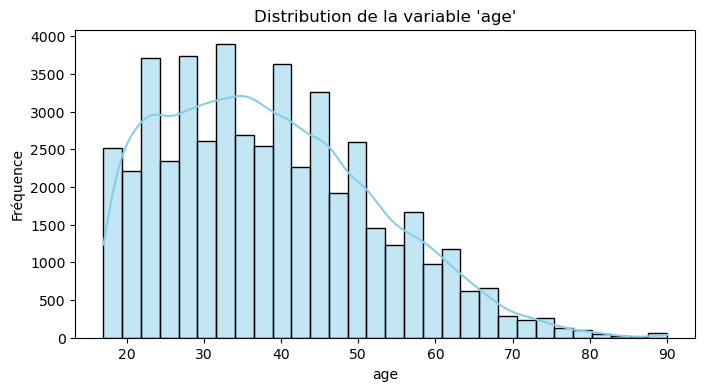

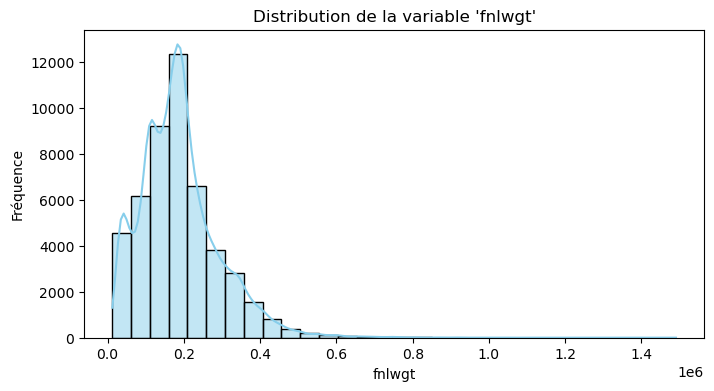

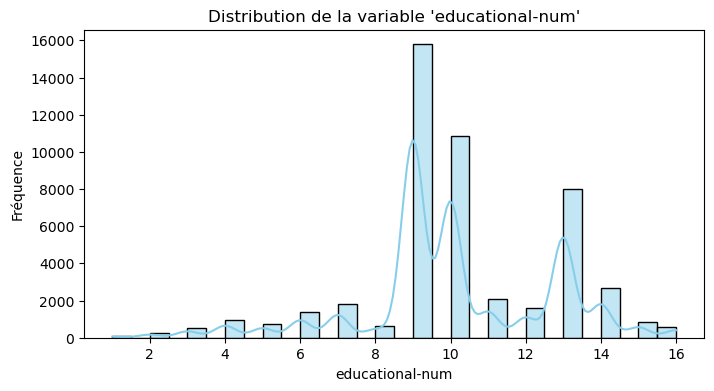

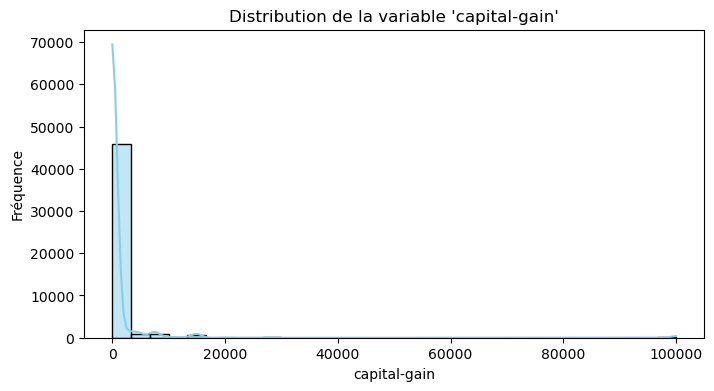

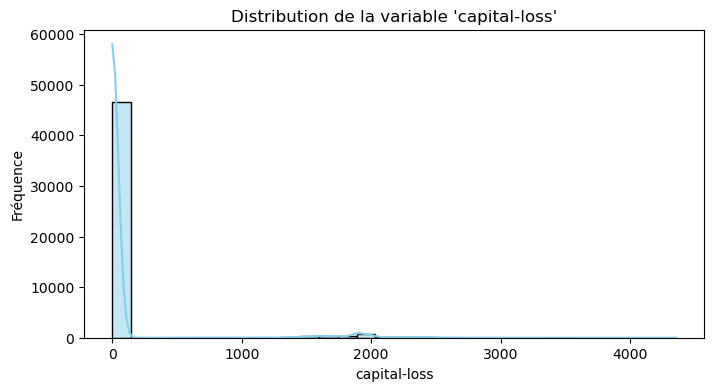

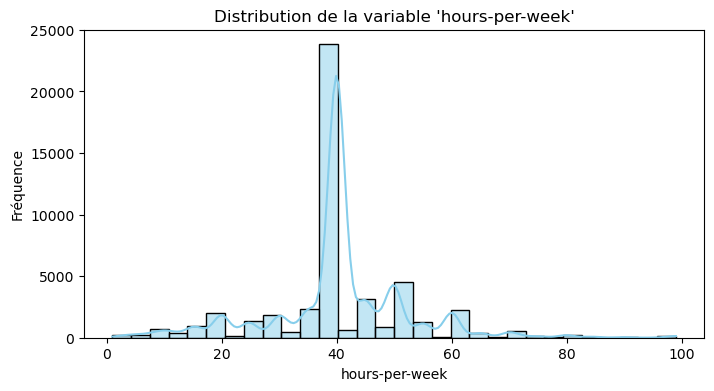

In [17]:
def plot_numerical_distributions(df):
    """
    Affiche des histogrammes pour les variables numériques.
    :param df: DataFrame Pandas
    """
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
        plt.title(f"Distribution de la variable '{col}'")
        plt.xlabel(col)
        plt.ylabel("Fréquence")
        plt.show()

# Exemple d'utilisation
plot_numerical_distributions(df)


## Distribution des valeurs catégorielles

/var/folders/9d/cb6z3gtd5zs9k8tz68809lxh0000gn/T/ipykernel_9838/3916170006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="viridis", order=df[col].value_counts().index)


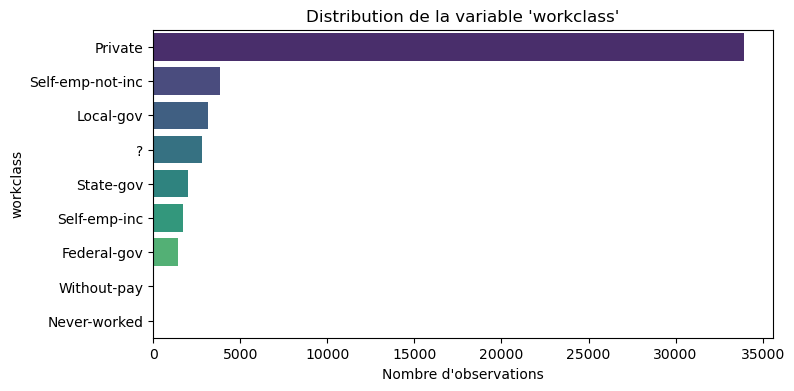

/var/folders/9d/cb6z3gtd5zs9k8tz68809lxh0000gn/T/ipykernel_9838/3916170006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="viridis", order=df[col].value_counts().index)


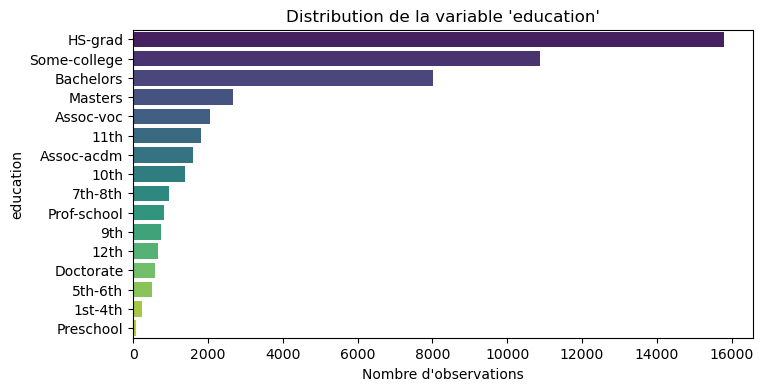

/var/folders/9d/cb6z3gtd5zs9k8tz68809lxh0000gn/T/ipykernel_9838/3916170006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="viridis", order=df[col].value_counts().index)


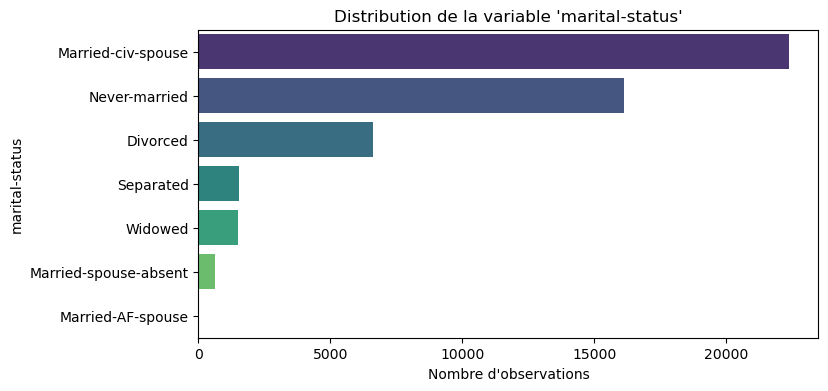

/var/folders/9d/cb6z3gtd5zs9k8tz68809lxh0000gn/T/ipykernel_9838/3916170006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="viridis", order=df[col].value_counts().index)


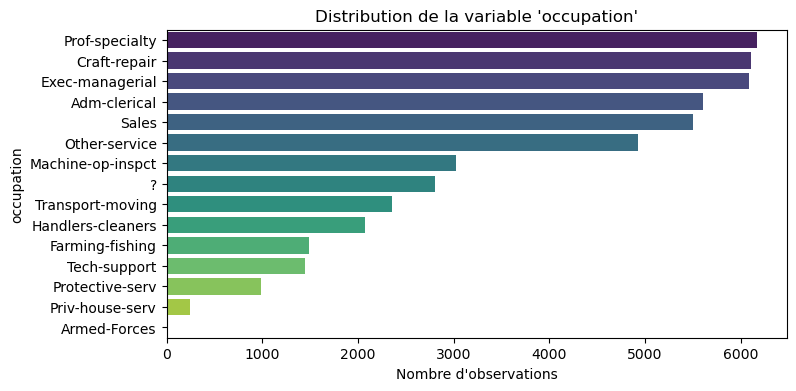

/var/folders/9d/cb6z3gtd5zs9k8tz68809lxh0000gn/T/ipykernel_9838/3916170006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="viridis", order=df[col].value_counts().index)


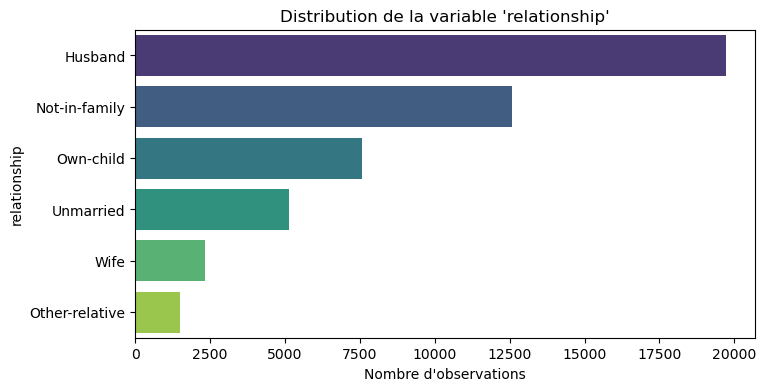

/var/folders/9d/cb6z3gtd5zs9k8tz68809lxh0000gn/T/ipykernel_9838/3916170006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="viridis", order=df[col].value_counts().index)


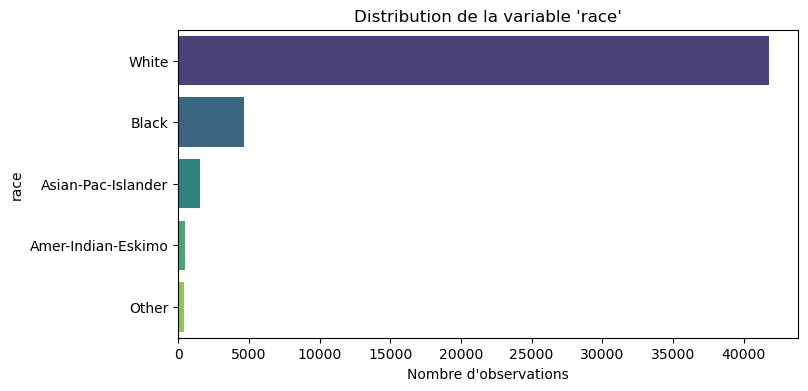

/var/folders/9d/cb6z3gtd5zs9k8tz68809lxh0000gn/T/ipykernel_9838/3916170006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="viridis", order=df[col].value_counts().index)


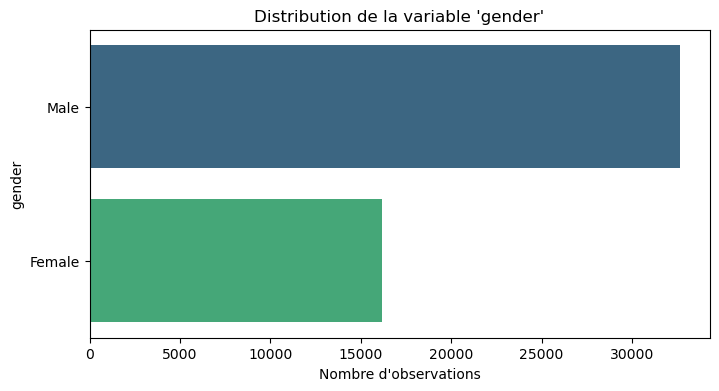

/var/folders/9d/cb6z3gtd5zs9k8tz68809lxh0000gn/T/ipykernel_9838/3916170006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="viridis", order=df[col].value_counts().index)


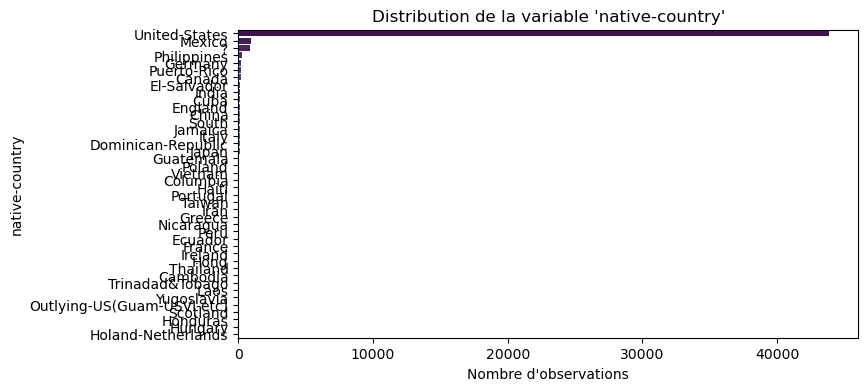

/var/folders/9d/cb6z3gtd5zs9k8tz68809lxh0000gn/T/ipykernel_9838/3916170006.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="viridis", order=df[col].value_counts().index)


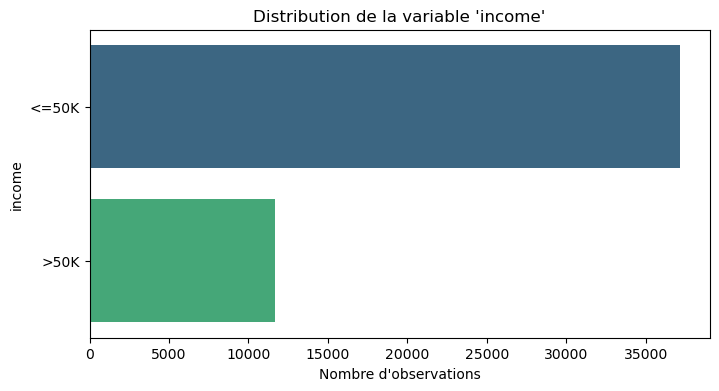

In [19]:
def plot_categorical_distributions(df):
    """
    Affiche des diagrammes en barres pour les variables catégorielles.
    :param df: DataFrame Pandas
    """
    categorical_cols = df.select_dtypes(include='object').columns

    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], palette="viridis", order=df[col].value_counts().index)
        plt.title(f"Distribution de la variable '{col}'")
        plt.xlabel("Nombre d'observations")
        plt.ylabel(col)
        plt.show()

# Exemple d'utilisation
plot_categorical_distributions(df)


## Matrice de corrélation

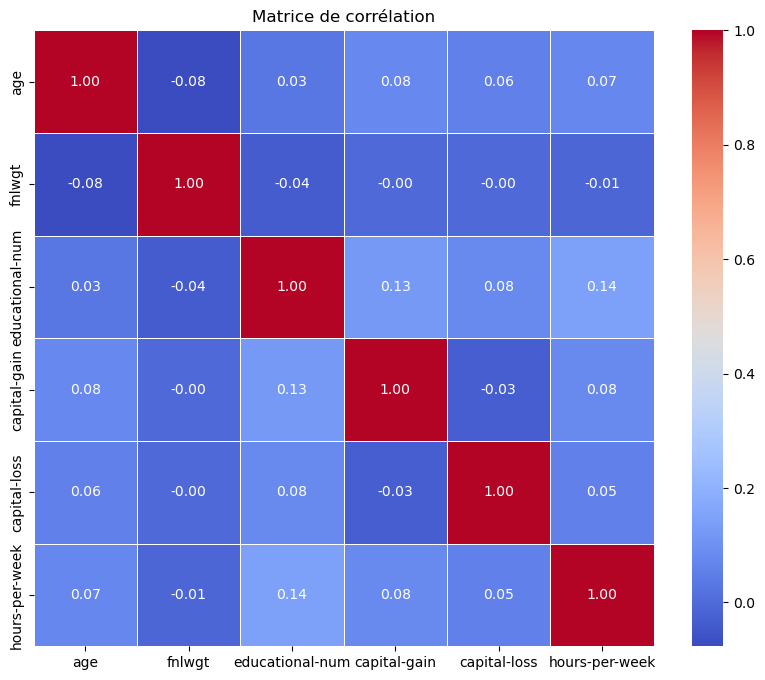

In [21]:
def plot_correlation_matrix(df):
    """
    Affiche la matrice de corrélation pour les variables numériques.
    :param df: DataFrame Pandas
    """
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    corr_matrix = numeric_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Matrice de corrélation")
    plt.show()

# Exemple d'utilisation
plot_correlation_matrix(df)


On remarque la presence de ? dans le jeu de donnée, on decide de les supprimer. Et de regrouper les modalités rares

# Recodage des variables

In [97]:
# Fonction pour supprimer les "?"

def drop_data(df):
    """
    Supprime les lignes contenant un '?' dans un DataFrame.

    Args:
        df (pd.DataFrame): Le DataFrame à traiter.
    
    Returns:
        pd.DataFrame: Le DataFrame nettoyé sans les lignes contenant '?'.
    """
    # Supprimer les lignes où au moins un élément est '?'
    df_cleaned = df[~df.isin(['?']).any(axis=1)]
    return df_cleaned


In [99]:
drop_data(df)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [101]:
# Fonction de recodage des variables

def numeriser_toutes_colonnes(df):
    """
    Cette fonction numérise plusieurs colonnes spécifiées dans le DataFrame 
    avec des mappings prédéfinis directement dans la fonction.

    :param df: DataFrame contenant les données à numériser
    :return: DataFrame avec les colonnes numérisées
    """




    #Suppression de la variable education : c'est la même que educational num

    if 'education' in df.columns:
        df = df.drop(columns=['education'])
        
    # Mapping pour 'workclass'
    workclass_mapping = {
        'Private': 1,
        'Self-emp-not-inc': 2,
        'Local-gov': 3,
        'State-gov': 4,
        'Self-emp-inc': 5,
        'Federal-gov': 6,
        'Without-pay': 7,
        'Never-worked': 8
    }
    
    # Mapping pour 'marital-status'
    marital_status_mapping = {
        'Never-married': 1,
        'Married-civ-spouse': 2,
        'Widowed': 3,
        'Divorced': 4,
        'Separated': 5,
        'Married-spouse-absent': 6,
        'Married-AF-spouse': 7
    }
    
    # Mapping pour 'occupation'
    occupation_mapping = {
        'Machine-op-inspct': 1,
        'Farming-fishing': 2,
        'Protective-serv': 3,
        'Other-service': 4,
        'Prof-specialty': 5,
        'Craft-repair': 6,
        'Adm-clerical': 7,
        'Exec-managerial': 8,
        'Tech-support': 9,
        'Sales': 10,
        'Priv-house-serv': 11,
        'Transport-moving': 12,
        'Handlers-cleaners': 13,
        'Armed-Forces': 14
    }
    
    # Mapping pour 'relationship'
    relationship_mapping = {
        'Own-child': 1,
        'Husband': 2,
        'Not-in-family': 3,
        'Unmarried': 4,
        'Wife': 5,
        'Other-relative': 6
    }
    
    # Mapping pour 'race'
    race_mapping = {
        'Black': 1,
        'White': 2,
        'Asian-Pac-Islander': 3,
        'Other': 4,
        'Amer-Indian-Eskimo': 5
    }
    
    # Mapping pour 'gender'
    gender_mapping = {
        'Male': 1,
        'Female': 2
    }
    
    # Mapping pour 'native-country'
    native_country_mapping = {
        'United-States': 1,
        'Peru': 2,
        'Guatemala': 3,
        'Mexico': 4,
        'Dominican-Republic': 5,
        'Ireland': 6,
        'Germany': 7,
        'Philippines': 8,
        'Thailand': 9,
        'Haiti': 10,
        'El-Salvador': 11,
        'Puerto-Rico': 12,
        'Vietnam': 13,
        'South': 14,
        'Columbia': 15,
        'Japan': 16,
        'India': 17,
        'Cambodia': 18,
        'Poland': 19,
        'Laos': 20,
        'England': 21,
        'Cuba': 22,
        'Taiwan': 23,
        'Italy': 24,
        'Canada': 25,
        'Portugal': 26,
        'China': 27,
        'Nicaragua': 28,
        'Honduras': 29,
        'Iran': 30,
        'Scotland': 31,
        'Jamaica': 32,
        'Ecuador': 33,
        'Yugoslavia': 34,
        'Hungary': 35,
        'Hong': 36,
        'Greece': 37,
        'Trinadad&Tobago': 38,
        'Outlying-US(Guam-USVI-etc)': 39,
        'France': 40,
        'Holand-Netherlands': 41
    }
    
    # Mapping pour 'income'
    income_mapping = {
        '<=50K': 0,
        '>50K': 1
    }
    
    # List des colonnes à numériser avec leurs mappings
    mappings = {
        'workclass': workclass_mapping,
        'marital-status': marital_status_mapping,
        'occupation': occupation_mapping,
        'relationship': relationship_mapping,
        'race': race_mapping,
        'gender': gender_mapping,
        'native-country': native_country_mapping,
        'income': income_mapping
    }

    # Suppression des espaces dans les colonnes concernées
    cols_to_strip = ['workclass', 'occupation', 'native-country']
    for col in cols_to_strip:
        df[col] = df[col].str.strip()

    # Appliquer les mappings de numérisation à chaque colonne
    for col, mapping in mappings.items():
        df[col] = df[col].replace(mapping)
    
    return df

# Analyse Exploratoire des données

/var/folders/9d/cb6z3gtd5zs9k8tz68809lxh0000gn/T/ipykernel_9838/3071751613.py:156: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapping)




Données nettoyées et numérisées :
<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45222 non-null  int64
 1   workclass        45222 non-null  int64
 2   fnlwgt           45222 non-null  int64
 3   educational-num  45222 non-null  int64
 4   marital-status   45222 non-null  int64
 5   occupation       45222 non-null  int64
 6   relationship     45222 non-null  int64
 7   race             45222 non-null  int64
 8   gender           45222 non-null  int64
 9   capital-gain     45222 non-null  int64
 10  capital-loss     45222 non-null  int64
 11  hours-per-week   45222 non-null  int64
 12  native-country   45222 non-null  int64
 13  income           45222 non-null  int64
dtypes: int64(14)
memory usage: 5.2 MB
None
Statistiques descriptives des variables numériques :
                age     workclass        fnlwgt  educationa

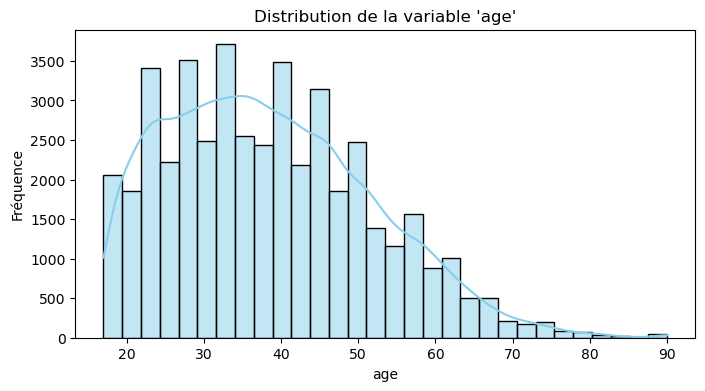

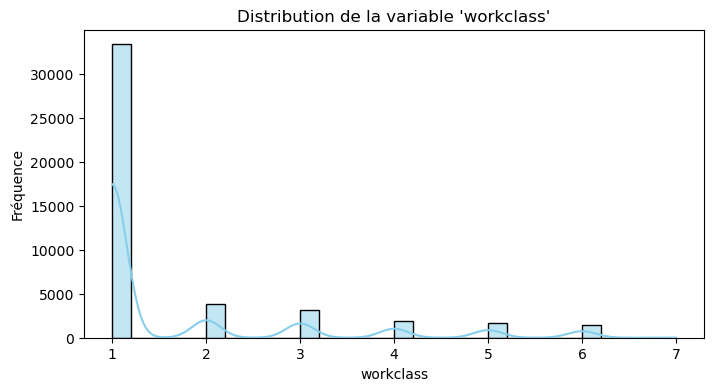

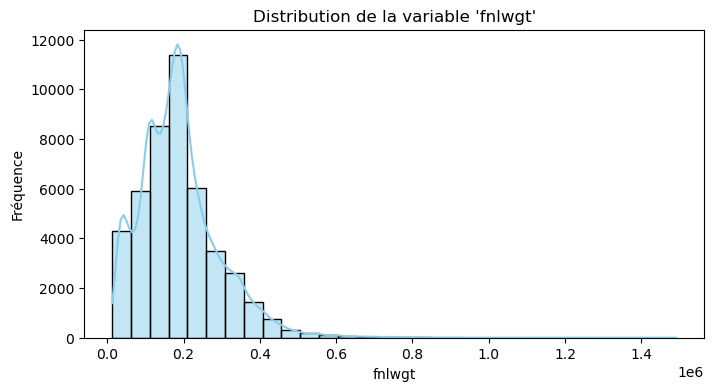

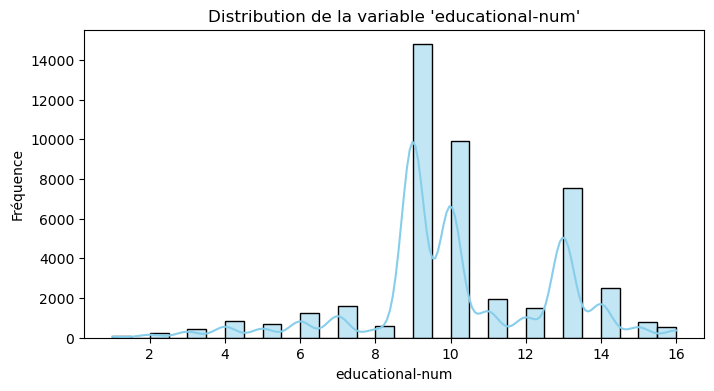

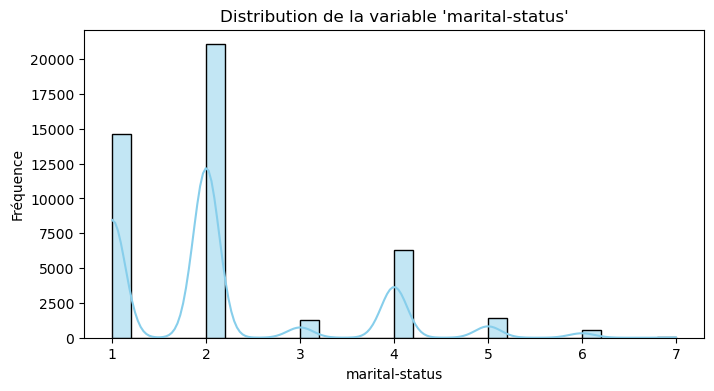

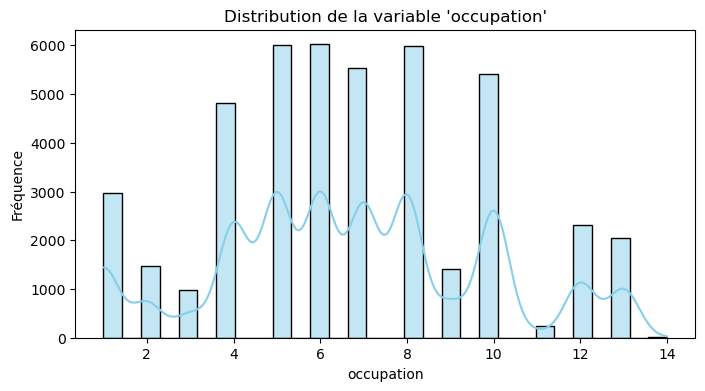

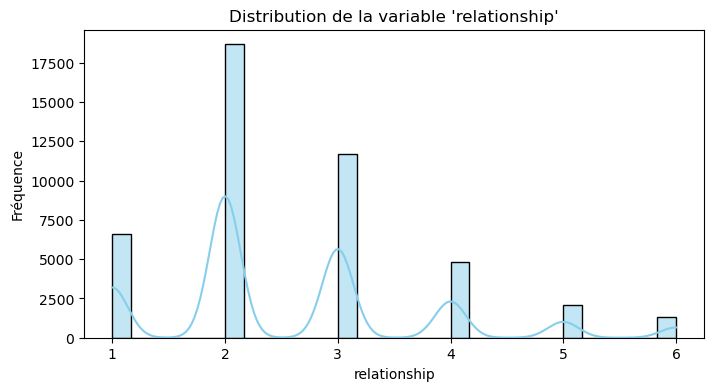

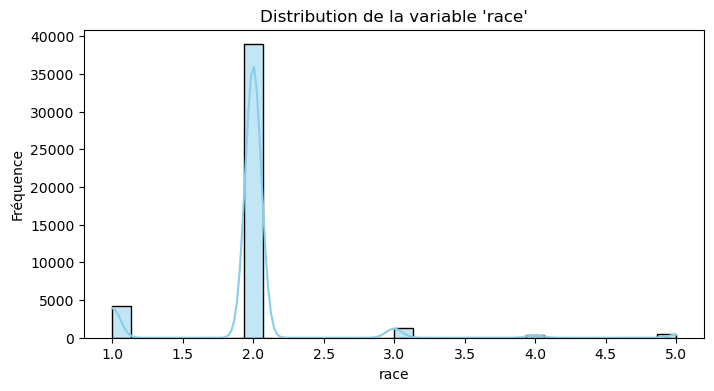

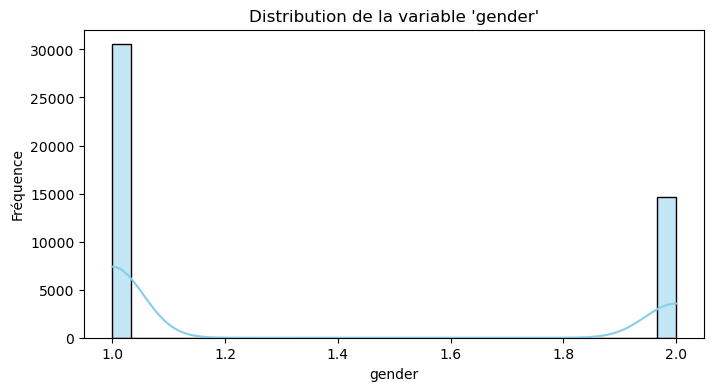

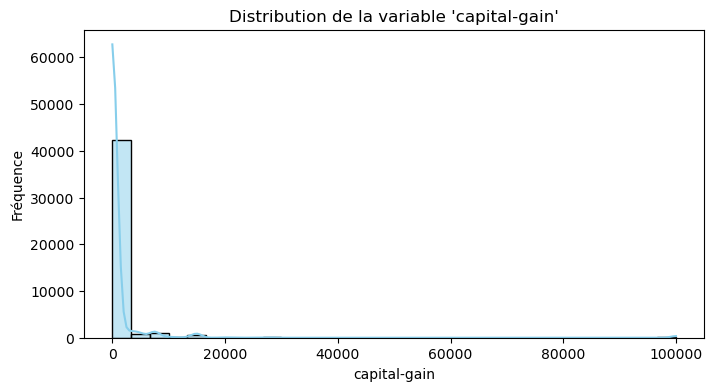

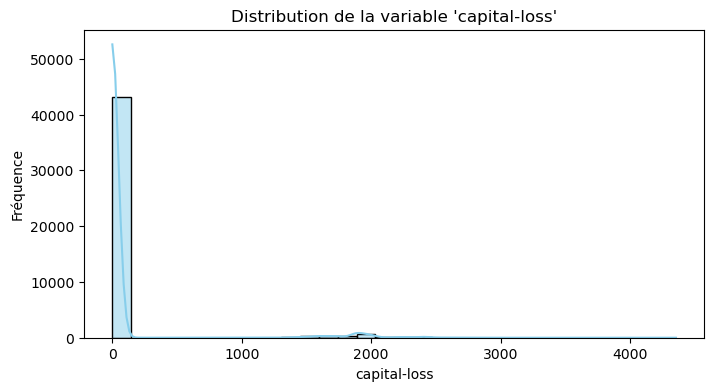

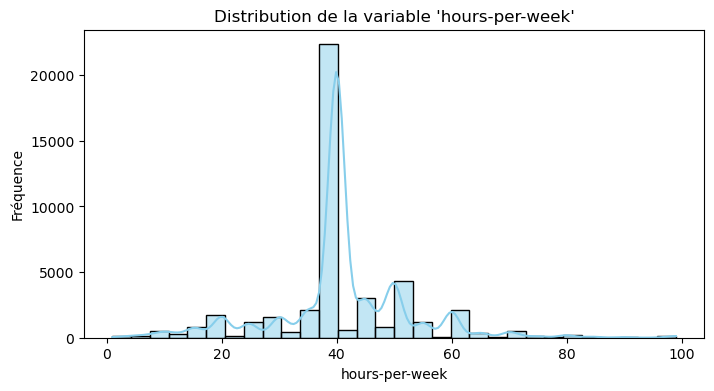

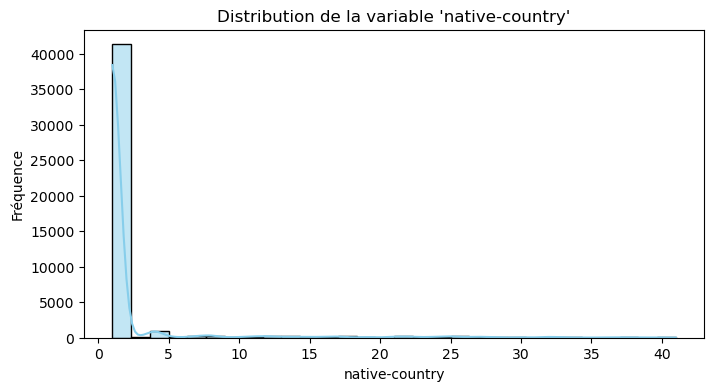

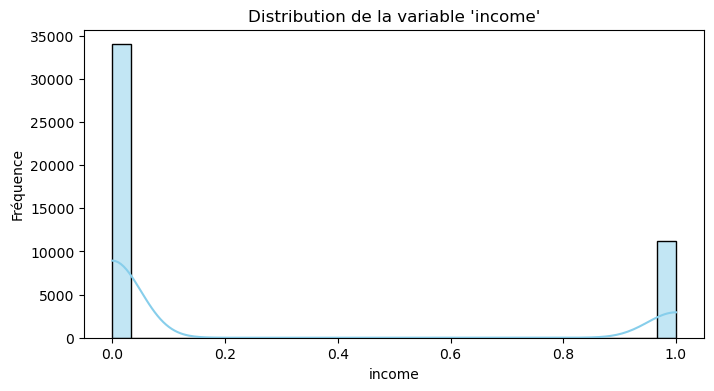

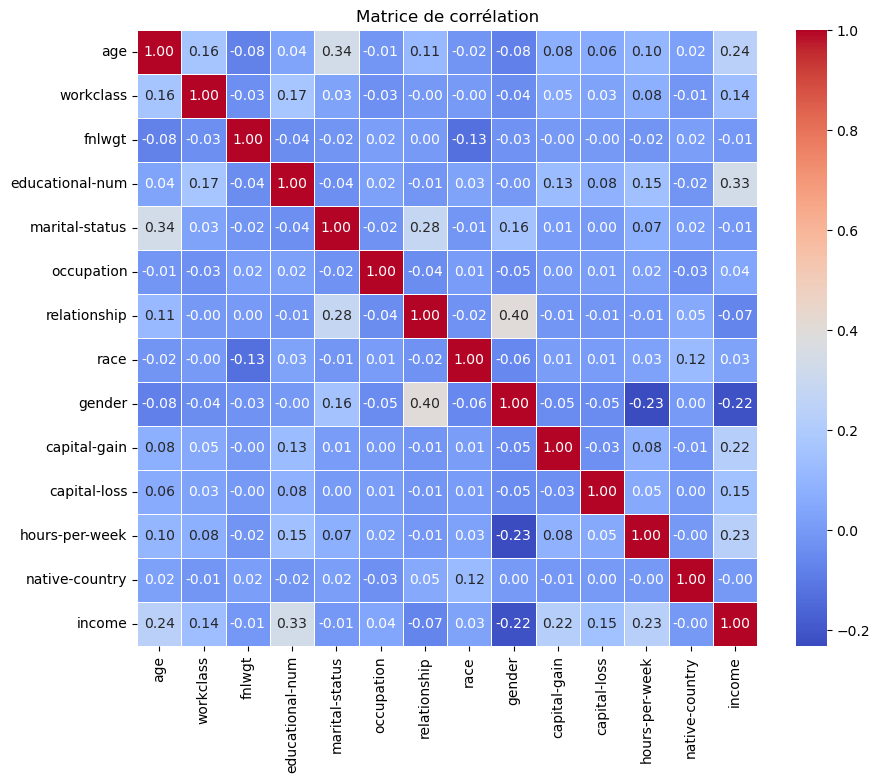

In [54]:
def full_data_analysis(file_path):
    """
    Effectue une analyse complète des données.
    :param file_path: Chemin du fichier CSV
    """

    df = load_and_describe_data(file_path)
    df_cleaned = drop_data(df)

    # Vérifier si le DataFrame nettoyé est vide
    if df_cleaned.empty:
        print("Attention, le DataFrame nettoyé est vide après la suppression des '?'!")
    else:
        # Numériser les colonnes avec des mappings
        df_cleaned = numeriser_toutes_colonnes(df_cleaned)

    print("\n\nDonnées nettoyées et numérisées :")
    print(df_cleaned.info())


    descriptive_statistics(df_cleaned)
    plot_numerical_distributions(df_cleaned)
    plot_categorical_distributions(df_cleaned)
    plot_correlation_matrix(df_cleaned)

# Exemple d'utilisation
full_data_analysis("data/revenus.csv")


# Modélisation

In [107]:
def model(df):
    """
    Entraîne et évalue plusieurs modèles de classification sur le DataFrame d'entrée.

    Parameters:
    - df : Le DataFrame contenant les données. 

    Returns:
    - pd.DataFrame: Un DataFrame contenant les résultats de l'évaluation des modèles.

    Cette fonction effectue les étapes suivantes :
    1. Divise les données d'entrée en ensembles d'entraînement et de test.
    2. Définit un ensemble de modèles de classification, y compris DecisionTree, KNeighbors, LogisticRegression et RandomForest.
    3. Spécifie des grilles d'hyperparamètres pour chaque modèle pour l'ajustement des hyperparamètres.
    4. Itère sur chaque modèle, créant un pipeline avec ou sans mise à l'échelle en fonction du type de modèle.
    5. Utilise GridSearchCV pour trouver les meilleurs hyperparamètres pour chaque modèle.
    6. Affiche et enregistre les meilleurs hyperparamètres, la précision, le score et le rapport de classification pour chaque modèle sur l'ensemble de test.

    Remarque : Cette fonction suppose que la variable cible est 'SALAIRE' dans le DataFrame d'entrée.

    Example:
    data = pd.read_csv('votre_data.csv')
    results = model(data)
    """

    y = df.income
    X = df.drop('income', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    models = {
        'DecisionTree': DecisionTreeClassifier(),
        'KNeighbors': KNeighborsClassifier(),
        'LogisticRegression': LogisticRegression(),
        'RandomForest': RandomForestClassifier()
    }

    param_grid = {
        'DecisionTree': {'model__criterion': ['gini', 'entropy'], 'model__max_depth': [None, 5, 10, 15]},
        'KNeighbors': {'model__n_neighbors': [3, 5, 7], 'model__weights': ['uniform', 'distance']},
        'LogisticRegression': {'model__C': [0.1, 1, 10], 'model__penalty': ['l1', 'l2']},
        'RandomForest': {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 5, 10, 15],
                         'model__criterion': ['gini', 'entropy']}
    }

    for model_name, model in models.items():
        if 'KNeighbors' in model_name or 'LogisticRegression' in model_name:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('model', model)
            ])
        else:
            pipeline = Pipeline([
                ('model', model)
            ])

        grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        y_pred = grid_search.predict(X_test)
        print(f"Accuracy for {model_name}: {accuracy_score(y_test, y_pred)}")
        print(f"Score for {model_name}: {grid_search.score(X_test, y_test)}")
        print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
        print("=" * 80)


In [109]:
# Exemple d'utilisation
df=numeriser_toutes_colonnes(df)
model(df)

ValueError: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/tree/_classes.py", line 1009, in fit
    super()._fit(
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/tree/_classes.py", line 252, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 645, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '?'


In [105]:
df=numeriser_toutes_colonnes(df)
df

/var/folders/9d/cb6z3gtd5zs9k8tz68809lxh0000gn/T/ipykernel_9838/3071751613.py:156: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapping)


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,1,226802,7,1,1,1,1,1,0,0,40,1,0
1,38,1,89814,9,2,2,2,2,1,0,0,50,1,0
2,28,3,336951,12,2,3,2,2,1,0,0,40,1,1
3,44,1,160323,10,2,1,2,1,1,7688,0,40,1,1
4,18,?,103497,10,1,?,1,2,2,0,0,30,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,1,257302,12,2,9,5,2,2,0,0,38,1,0
48838,40,1,154374,9,2,1,2,2,1,0,0,40,1,1
48839,58,1,151910,9,3,7,4,2,2,0,0,40,1,0
48840,22,1,201490,9,1,7,1,2,1,0,0,20,1,0
